In [1]:
import tensorflow as tf

2023-01-17 00:54:54.125013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 00:54:54.125085: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import requests
import pandas as pd
import numpy as np

In [9]:
data = {'campoX' : ['0.12,0.25,0.18,0.32,0.48,0.45' , 
                    '0.25,0.13,0.07,0.15,0.03,0.18', 
                    '0.45,0.35,0.55,0.18,0.25,0.13', 
                    '0.35,0.37,0.56,0.45,0.6,0.61'],
        'campoY' : [1,0,0,1] }
df = pd.DataFrame(data)

In [10]:
def trataLinhaX(linha):
    return np.fromstring(linha['campoX'], dtype=float, sep=',')

In [11]:
dfTratadoX = df.apply(trataLinhaX, axis='columns')
X = np.stack(dfTratadoX.values)
X.shape

(4, 6)

In [12]:
Y = np.stack(df['campoY'].values)
Y = Y.reshape(-1,1)
Y.shape

(4, 1)

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=32, input_shape=(6,1), activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu")) 
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1248      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [77]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

In [78]:
X2 =  X[...,None]

In [79]:
history = model.fit(x=X2.T,y=Y,
                    epochs=10,
                    verbose=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 4
Make sure all arrays contain the same number of samples.

In [72]:
print(type(X))

<class 'numpy.ndarray'>


In [73]:
previsao = np.array([[0.1, 0.2, 0.3, 0.4,0.5,0.6]])

In [74]:
print(previsao)

[[0.1 0.2 0.3 0.4 0.5 0.6]]


In [75]:
model.predict(previsao)

array([[0.12695576]], dtype=float32)

# SimpleRNN

In [81]:
modelRnn =  tf.keras.Sequential()
modelRnn.add(tf.keras.layers.SimpleRNN(3, input_shape=(6,1), activation='linear'))
modelRnn.add(tf.keras.layers.Dense(units=1, activation='linear'))
modelRnn.compile(loss='mean_squared_error', optimizer='adam')

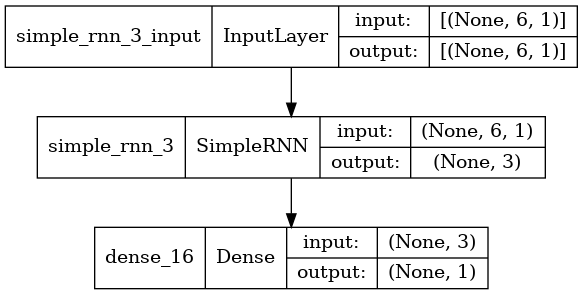

In [83]:
tf.keras.utils.plot_model(modelRnn, show_shapes=True)